# Hotel Booking Modeling


In [81]:
#import the libraries and booking dataset
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline

In [82]:
raw_csv_data= pd.read_csv('hotel_bookings.csv')

In [83]:
df = raw_csv_data.copy()

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

In [5]:
df.shape

(119390, 32)

In [6]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
df['hotel']=df['hotel'].map({'Resort Hotel':1,'City Hotel':'0'})

In [8]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,1,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,1,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,1,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,1,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,0,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,0,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,0,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [9]:
df['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [10]:
df['arrival_date_month'].value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

In [11]:
Month={'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}

In [12]:
df['Month']=df['arrival_date_month'].map(Month)

In [13]:
df['Month'].value_counts()

8     13877
7     12661
5     11791
10    11160
4     11089
6     10939
9     10508
3      9794
2      8068
11     6794
12     6780
1      5929
Name: Month, dtype: int64

In [14]:
df['datetime']=pd.to_datetime(dict(year=df.arrival_date_year, month=df.Month, day=df.arrival_date_day_of_month))

In [15]:
def day_of_week(datetime):
    return datetime.weekday()

In [16]:
df['day_of_week']= df['datetime'].apply(day_of_week)

In [17]:
df.drop(['arrival_date_year','arrival_date_month','arrival_date_week_number','arrival_date_day_of_month','reservation_status_date','datetime'],axis=1,inplace=True)

In [18]:
a=df['country'].value_counts().head(15).index.tolist()

In [19]:
a

['PRT',
 'GBR',
 'FRA',
 'ESP',
 'DEU',
 'ITA',
 'IRL',
 'BEL',
 'BRA',
 'NLD',
 'USA',
 'CHE',
 'CN',
 'AUT',
 'SWE']

In [20]:
df[df['country'].isin(a)].is_canceled.value_counts()

0    67396
1    40797
Name: is_canceled, dtype: int64

In [21]:
df1=df[df['country'].isin(a)]

In [22]:
df1

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,Month,day_of_week
0,1,0,342,0,0,2,0.0,0,BB,PRT,...,NaN,NaN,0,Transient,0.00,0,0,Check-Out,7,2
1,1,0,737,0,0,2,0.0,0,BB,PRT,...,NaN,NaN,0,Transient,0.00,0,0,Check-Out,7,2
2,1,0,7,0,1,1,0.0,0,BB,GBR,...,NaN,NaN,0,Transient,75.00,0,0,Check-Out,7,2
3,1,0,13,0,1,1,0.0,0,BB,GBR,...,304.0,NaN,0,Transient,75.00,0,0,Check-Out,7,2
4,1,0,14,0,2,2,0.0,0,BB,GBR,...,240.0,NaN,0,Transient,98.00,0,1,Check-Out,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,23,2,5,2,0.0,0,BB,BEL,...,394.0,NaN,0,Transient,96.14,0,0,Check-Out,8,2
119386,0,0,102,2,5,3,0.0,0,BB,FRA,...,9.0,NaN,0,Transient,225.43,0,2,Check-Out,8,3
119387,0,0,34,2,5,2,0.0,0,BB,DEU,...,9.0,NaN,0,Transient,157.71,0,4,Check-Out,8,3
119388,0,0,109,2,5,2,0.0,0,BB,GBR,...,89.0,NaN,0,Transient,104.40,0,0,Check-Out,8,3


In [23]:
country_dummies=pd.get_dummies(df1['country'],drop_first=True)

In [24]:
df1['market_segment'].value_counts()

Online TA        48850
Offline TA/TO    23092
Groups           18993
Direct           11429
Corporate         4900
Complementary      719
Aviation           208
Undefined            2
Name: market_segment, dtype: int64

In [25]:
drop_undefined=df1[df1['market_segment']=='Undefined']

In [26]:
df1.drop(drop_undefined.index,axis=0)

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,Month,day_of_week
0,1,0,342,0,0,2,0.0,0,BB,PRT,...,NaN,NaN,0,Transient,0.00,0,0,Check-Out,7,2
1,1,0,737,0,0,2,0.0,0,BB,PRT,...,NaN,NaN,0,Transient,0.00,0,0,Check-Out,7,2
2,1,0,7,0,1,1,0.0,0,BB,GBR,...,NaN,NaN,0,Transient,75.00,0,0,Check-Out,7,2
3,1,0,13,0,1,1,0.0,0,BB,GBR,...,304.0,NaN,0,Transient,75.00,0,0,Check-Out,7,2
4,1,0,14,0,2,2,0.0,0,BB,GBR,...,240.0,NaN,0,Transient,98.00,0,1,Check-Out,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,23,2,5,2,0.0,0,BB,BEL,...,394.0,NaN,0,Transient,96.14,0,0,Check-Out,8,2
119386,0,0,102,2,5,3,0.0,0,BB,FRA,...,9.0,NaN,0,Transient,225.43,0,2,Check-Out,8,3
119387,0,0,34,2,5,2,0.0,0,BB,DEU,...,9.0,NaN,0,Transient,157.71,0,4,Check-Out,8,3
119388,0,0,109,2,5,2,0.0,0,BB,GBR,...,89.0,NaN,0,Transient,104.40,0,0,Check-Out,8,3


In [27]:
df1.drop(['distribution_channel'],axis=1,inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [28]:
meal_dummies=pd.get_dummies(df1['meal'],drop_first=True)

In [29]:
df1['is_repeated_guest'].value_counts()

0    104473
1      3720
Name: is_repeated_guest, dtype: int64

In [30]:
df1['previous_cancellations'].value_counts()

0     101754
1       6012
2        113
3         65
24        48
11        32
4         31
26        26
25        25
6         22
19        19
5         19
14        14
13        12
21         1
Name: previous_cancellations, dtype: int64

In [31]:
def map_cancellation(value):
    if value ==0:
        return 0;
    else:
        return 1;

In [32]:
df1['previous_cancellations']=df1['previous_cancellations'].apply(map_cancellation)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
df1['previous_cancellations'].value_counts()

0    101754
1      6439
Name: previous_cancellations, dtype: int64

In [34]:
df1['previous_bookings_not_canceled'].value_counts()

0     104878
1       1389
2        528
3        299
4        206
       ...  
47         1
36         1
49         1
50         1
63         1
Name: previous_bookings_not_canceled, Length: 73, dtype: int64

In [35]:
df1['previous_bookings_not_canceled']=df1['previous_bookings_not_canceled'].apply(map_cancellation)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
df1['previous_bookings_not_canceled'].value_counts()

0    104878
1      3315
Name: previous_bookings_not_canceled, dtype: int64

In [37]:
df1['reserved_room_type'].value_counts()

A    78521
D    17065
E     5899
F     2496
G     1848
B      971
C      856
H      529
L        6
P        2
Name: reserved_room_type, dtype: int64

In [38]:
df1['assigned_room_type'].value_counts()

A    67599
D    22649
E     7062
F     3271
G     2253
C     2206
B     1931
H      631
I      346
K      242
P        2
L        1
Name: assigned_room_type, dtype: int64

In [39]:
df1['room_matching']=(df['reserved_room_type']==df['assigned_room_type']).map({True:1,False:0})

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
df1['room_matching'].value_counts()

1    94574
0    13619
Name: room_matching, dtype: int64

In [41]:
df1.drop(['reserved_room_type','assigned_room_type','booking_changes','customer_type','reservation_status'],axis=1,inplace=True)

In [42]:
df1['deposit_type'].value_counts()

No Deposit    93506
Non Refund    14530
Refundable      157
Name: deposit_type, dtype: int64

In [43]:
def deposit_type(value):
    if value=='No Deposit':
        return 0;
    else: 
        return 1;


In [44]:
df1['deposit_type']=df1['deposit_type'].apply(deposit_type)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
df1['deposit_type'].value_counts()

0    93506
1    14687
Name: deposit_type, dtype: int64

In [46]:
df1

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,deposit_type,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,Month,day_of_week,room_matching
0,1,0,342,0,0,2,0.0,0,BB,PRT,...,0,NaN,NaN,0,0.00,0,0,7,2,1
1,1,0,737,0,0,2,0.0,0,BB,PRT,...,0,NaN,NaN,0,0.00,0,0,7,2,1
2,1,0,7,0,1,1,0.0,0,BB,GBR,...,0,NaN,NaN,0,75.00,0,0,7,2,0
3,1,0,13,0,1,1,0.0,0,BB,GBR,...,0,304.0,NaN,0,75.00,0,0,7,2,1
4,1,0,14,0,2,2,0.0,0,BB,GBR,...,0,240.0,NaN,0,98.00,0,1,7,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,23,2,5,2,0.0,0,BB,BEL,...,0,394.0,NaN,0,96.14,0,0,8,2,1
119386,0,0,102,2,5,3,0.0,0,BB,FRA,...,0,9.0,NaN,0,225.43,0,2,8,3,1
119387,0,0,34,2,5,2,0.0,0,BB,DEU,...,0,9.0,NaN,0,157.71,0,4,8,3,1
119388,0,0,109,2,5,2,0.0,0,BB,GBR,...,0,89.0,NaN,0,104.40,0,0,8,3,1


In [47]:
df1['days_in_waiting_list'].value_counts()

0      104667
39        227
44        141
31        127
58        102
        ...  
116         1
92          1
54          1
117         1
109         1
Name: days_in_waiting_list, Length: 127, dtype: int64

In [48]:
df1['days_in_waiting_list']=df1['days_in_waiting_list'].apply(map_cancellation)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
df1['days_in_waiting_list'].value_counts()

0    104667
1      3526
Name: days_in_waiting_list, dtype: int64

In [50]:
df1

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,deposit_type,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,Month,day_of_week,room_matching
0,1,0,342,0,0,2,0.0,0,BB,PRT,...,0,NaN,NaN,0,0.00,0,0,7,2,1
1,1,0,737,0,0,2,0.0,0,BB,PRT,...,0,NaN,NaN,0,0.00,0,0,7,2,1
2,1,0,7,0,1,1,0.0,0,BB,GBR,...,0,NaN,NaN,0,75.00,0,0,7,2,0
3,1,0,13,0,1,1,0.0,0,BB,GBR,...,0,304.0,NaN,0,75.00,0,0,7,2,1
4,1,0,14,0,2,2,0.0,0,BB,GBR,...,0,240.0,NaN,0,98.00,0,1,7,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,23,2,5,2,0.0,0,BB,BEL,...,0,394.0,NaN,0,96.14,0,0,8,2,1
119386,0,0,102,2,5,3,0.0,0,BB,FRA,...,0,9.0,NaN,0,225.43,0,2,8,3,1
119387,0,0,34,2,5,2,0.0,0,BB,DEU,...,0,9.0,NaN,0,157.71,0,4,8,3,1
119388,0,0,109,2,5,2,0.0,0,BB,GBR,...,0,89.0,NaN,0,104.40,0,0,8,3,1


In [51]:
df1['required_car_parking_spaces'].value_counts()

0    101378
1      6783
2        27
3         3
8         2
Name: required_car_parking_spaces, dtype: int64

In [52]:
df1['required_car_parking_spaces']=df1['required_car_parking_spaces'].apply(map_cancellation)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
df1['total_of_special_requests']=df1['total_of_special_requests'].apply(map_cancellation)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [54]:
df1.columns

Index(['hotel', 'is_canceled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'Month',
       'day_of_week', 'room_matching'],
      dtype='object')

In [55]:
df2=pd.concat([df1,country_dummies,meal_dummies],axis=1)

In [56]:
df2

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,IRL,ITA,NLD,PRT,SWE,USA,FB,HB,SC,Undefined
0,1,0,342,0,0,2,0.0,0,BB,PRT,...,0,0,0,1,0,0,0,0,0,0
1,1,0,737,0,0,2,0.0,0,BB,PRT,...,0,0,0,1,0,0,0,0,0,0
2,1,0,7,0,1,1,0.0,0,BB,GBR,...,0,0,0,0,0,0,0,0,0,0
3,1,0,13,0,1,1,0.0,0,BB,GBR,...,0,0,0,0,0,0,0,0,0,0
4,1,0,14,0,2,2,0.0,0,BB,GBR,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,23,2,5,2,0.0,0,BB,BEL,...,0,0,0,0,0,0,0,0,0,0
119386,0,0,102,2,5,3,0.0,0,BB,FRA,...,0,0,0,0,0,0,0,0,0,0
119387,0,0,34,2,5,2,0.0,0,BB,DEU,...,0,0,0,0,0,0,0,0,0,0
119388,0,0,109,2,5,2,0.0,0,BB,GBR,...,0,0,0,0,0,0,0,0,0,0


In [57]:
df2.describe()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,...,IRL,ITA,NLD,PRT,SWE,USA,FB,HB,SC,Undefined
count,108193.000000,108193.000000,108193.000000,108193.000000,108193.000000,108189.000000,108193.000000,108193.000000,108193.000000,108193.00000,...,108193.000000,108193.000000,108193.000000,108193.000000,108193.000000,108193.000000,108193.000000,108193.000000,108193.000000,108193.000000
mean,0.377076,106.796373,0.918710,2.483691,1.857782,0.098217,0.008013,0.034383,0.059514,0.03064,...,0.031194,0.034808,0.019447,0.449105,0.009465,0.019382,0.007256,0.126884,0.082723,0.010731
std,0.484656,108.716087,0.989379,1.873025,0.583328,0.387515,0.098422,0.182212,0.236585,0.17234,...,0.173843,0.183294,0.138090,0.497405,0.096825,0.137864,0.084870,0.332845,0.275464,0.103033
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,72.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,165.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,737.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108193 entries, 0 to 119389
Data columns (total 42 columns):
hotel                             108193 non-null object
is_canceled                       108193 non-null int64
lead_time                         108193 non-null int64
stays_in_weekend_nights           108193 non-null int64
stays_in_week_nights              108193 non-null int64
adults                            108193 non-null int64
children                          108189 non-null float64
babies                            108193 non-null int64
meal                              108193 non-null object
country                           108193 non-null object
market_segment                    108193 non-null object
is_repeated_guest                 108193 non-null int64
previous_cancellations            108193 non-null int64
previous_bookings_not_canceled    108193 non-null int64
deposit_type                      108193 non-null int64
agent                             93046 non

In [59]:
df2.drop(['country'],axis=1,inplace=True)

In [60]:
df3=pd.get_dummies(df2['market_segment'],drop_first=True)

In [61]:
df4=pd.concat([df2,df3],axis=1)

In [62]:
df4.drop(['market_segment'],axis=1,inplace=True)

In [63]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108193 entries, 0 to 119389
Data columns (total 47 columns):
hotel                             108193 non-null object
is_canceled                       108193 non-null int64
lead_time                         108193 non-null int64
stays_in_weekend_nights           108193 non-null int64
stays_in_week_nights              108193 non-null int64
adults                            108193 non-null int64
children                          108189 non-null float64
babies                            108193 non-null int64
meal                              108193 non-null object
is_repeated_guest                 108193 non-null int64
previous_cancellations            108193 non-null int64
previous_bookings_not_canceled    108193 non-null int64
deposit_type                      108193 non-null int64
agent                             93046 non-null float64
company                           6303 non-null float64
days_in_waiting_list              108193 non

In [64]:
df4.describe().adr.qua

AttributeError: 'Series' object has no attribute 'qua'

In [65]:
import seaborn as sns

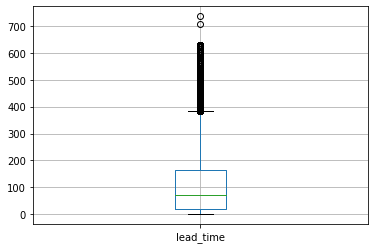

In [66]:
boxplot1 = df4.boxplot(column=['lead_time'])

In [67]:
df4.drop(df4[df4['lead_time']>=400].index,axis=0,inplace=True)

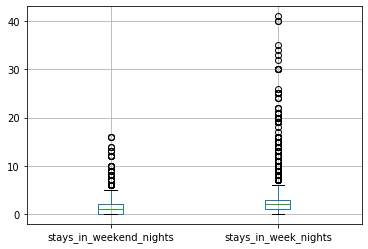

In [68]:
boxplot2 = df4.boxplot(column=['stays_in_weekend_nights', 'stays_in_week_nights'])

In [69]:
df4.drop(df4[df4['stays_in_week_nights']>=10].index,axis=0,inplace=True)

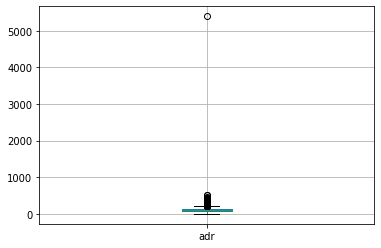

In [70]:
boxplot3 = df4.boxplot(column=['adr'])

In [71]:
np.quantile(df['adr'],0.99) 

252.0

In [72]:
df4.drop(df4[df4['adr']>=252].index,axis=0,inplace=True)

In [73]:
df4

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,is_repeated_guest,...,HB,SC,Undefined,Complementary,Corporate,Direct,Groups,Offline TA/TO,Online TA,Undefined
0,1,0,342,0,0,2,0.0,0,BB,0,...,0,0,0,0,0,1,0,0,0,0
2,1,0,7,0,1,1,0.0,0,BB,0,...,0,0,0,0,0,1,0,0,0,0
3,1,0,13,0,1,1,0.0,0,BB,0,...,0,0,0,0,1,0,0,0,0,0
4,1,0,14,0,2,2,0.0,0,BB,0,...,0,0,0,0,0,0,0,0,1,0
5,1,0,14,0,2,2,0.0,0,BB,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,23,2,5,2,0.0,0,BB,0,...,0,0,0,0,0,0,0,1,0,0
119386,0,0,102,2,5,3,0.0,0,BB,0,...,0,0,0,0,0,0,0,0,1,0
119387,0,0,34,2,5,2,0.0,0,BB,0,...,0,0,0,0,0,0,0,0,1,0
119388,0,0,109,2,5,2,0.0,0,BB,0,...,0,0,0,0,0,0,0,0,1,0


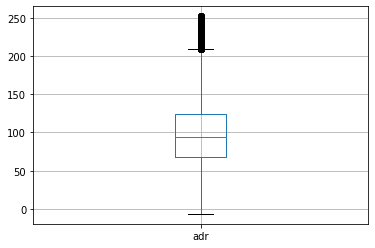

In [74]:
boxplot4 = df4.boxplot(column=['adr'])

In [75]:
df4.columns

Index(['hotel', 'is_canceled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'deposit_type', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'Month', 'day_of_week', 'room_matching',
       'BEL', 'BRA', 'CHE', 'CN', 'DEU', 'ESP', 'FRA', 'GBR', 'IRL', 'ITA',
       'NLD', 'PRT', 'SWE', 'USA', 'FB', 'HB', 'SC', 'Undefined',
       'Complementary', 'Corporate', 'Direct', 'Groups', 'Offline TA/TO',
       'Online TA', 'Undefined'],
      dtype='object')

In [76]:
df5=df4[['hotel', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'deposit_type',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'Month', 'day_of_week', 'room_matching',
       'BEL', 'BRA', 'CHE', 'CN', 'DEU', 'ESP', 'FRA', 'GBR', 'IRL', 'ITA',
       'NLD', 'PRT', 'SWE', 'USA', 'FB', 'HB', 'SC', 'Undefined',
       'Complementary', 'Corporate', 'Direct', 'Groups', 'Offline TA/TO',
       'Online TA', 'Undefined','is_canceled']]

In [80]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103839 entries, 0 to 119389
Data columns (total 46 columns):
hotel                             103839 non-null object
lead_time                         103839 non-null int64
stays_in_weekend_nights           103839 non-null int64
stays_in_week_nights              103839 non-null int64
adults                            103839 non-null int64
children                          103835 non-null float64
babies                            103839 non-null int64
is_repeated_guest                 103839 non-null int64
previous_cancellations            103839 non-null int64
previous_bookings_not_canceled    103839 non-null int64
deposit_type                      103839 non-null int64
days_in_waiting_list              103839 non-null int64
adr                               103839 non-null float64
required_car_parking_spaces       103839 non-null int64
total_of_special_requests         103839 non-null int64
Month                             103839 non

In [135]:
df5.to_csv('final_hotel_dataset.csv')